<a href="https://colab.research.google.com/github/bring-nirachornkul/Ubers-Trip-Data-in-NYC/blob/main/Uber_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is contributed by Bring Nirachornkul. MS-AI Student at UNT. This EDA demonstrate how busiest days in the week.

# Loading the library and datasets

Import Library for this Project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser
import calendar
import seaborn as sns
import plotly.express as px

Mounted Google Drive to the project

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
path = '/content/drive/MyDrive/Python-Project/Fall/Data Scientist/Ubers/Ubers-Trip-Data-in-NYC/uber-trip-data/'
path

'/content/drive/MyDrive/Python-Project/Fall/Data Scientist/Ubers/Ubers-Trip-Data-in-NYC/uber-trip-data/'

# Data Wrangling

Merged all Uber trips from April to September in 2014

In [9]:
#the months that has the Uber trips in 2014
m_2014 = ['apr','may', 'jun', 'jul', 'aug', 'sep']
file_path = path + 'uber-raw-data-{}14.csv'

#Read and concatenate pickup data
y_2014 = pd.DataFrame()

for i in m_2014:
  #print('size of {0}: {1}'.format(m_2014[i], len(df.index)))
  #print(i)     #read CSV file name
  df = pd.read_csv(file_path.format(i))
  y_2014 = pd.concat([y_2014, df])
  print('size of {0}: {1}'.format(i, len(y_2014)))


size of apr: 564516
size of may: 1216951
size of jun: 1880795
size of jul: 2676916
size of aug: 3506191
size of sep: 4534327


How many rows y_2014(year 2014) has?

In [10]:
y_2014.shape

(4534327, 4)

Convert Date/Time from String to date/Time format

In [11]:
#display before convert Date/Time
y_2014.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [12]:
reduce_mem_usage(y_2014)

Memory usage of dataframe is 172.97 MB
Memory usage after optimization is: 172.97 MB
Decreased by 0.0%


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [13]:
y_2014['Date/Time'] = pd.to_datetime(y_2014['Date/Time'])


Add Month, Day, Time, Hour, Day in the week column.

In [14]:
#add 'Month', 'Day', 'Time' into the column.
y_2014['Month'] = y_2014['Date/Time'].dt.month
y_2014['Day'] = y_2014['Date/Time'].dt.day
y_2014['Time'] = y_2014['Date/Time'].dt.time

#Display the dataframe after convert 'Date/Time' from string to Date/Time format.
y_2014.head()

y_2014['Weekday'] = y_2014['Date/Time'].dt.dayofweek
y_2014['Hour'] = y_2014['Date/Time'].dt.hour

y_2014.head()

,Date/Time,Lat,Lon,Base,Month,Day,Time,Weekday,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,00:11:00,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,00:17:00,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,00:21:00,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,00:28:00,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,00:33:00,1,0


In [15]:
#create a dictionary to map the month
month_map = {
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September'
}
#replace number by month
y_2014['Month'] = y_2014['Month'].replace(month_map)

#create a dictionary to map the day in the week
Dayweek_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
#replace number(1-7) to the day in the week
y_2014['Weekday'] = y_2014['Weekday'].replace(Dayweek_map)

final_columns = [
    'Base', 'Lat', 'Lon', 'Month', 
    'Day', 'Weekday', 'Hour']

y_2014 = y_2014[final_columns]
y_2014.head()


,Base,Lat,Lon,Month,Day,Weekday,Hour
0,B02512,40.7690,-73.9549,April,1,Tuesday,0
1,B02512,40.7267,-74.0345,April,1,Tuesday,0
2,B02512,40.7316,-73.9873,April,1,Tuesday,0
3,B02512,40.7588,-73.9776,April,1,Tuesday,0
4,B02512,40.7594,-73.9722,April,1,Tuesday,0


# Data Visualization

Display the base company on April 2014

In [16]:
np.unique(y_2014['Base'].values)

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


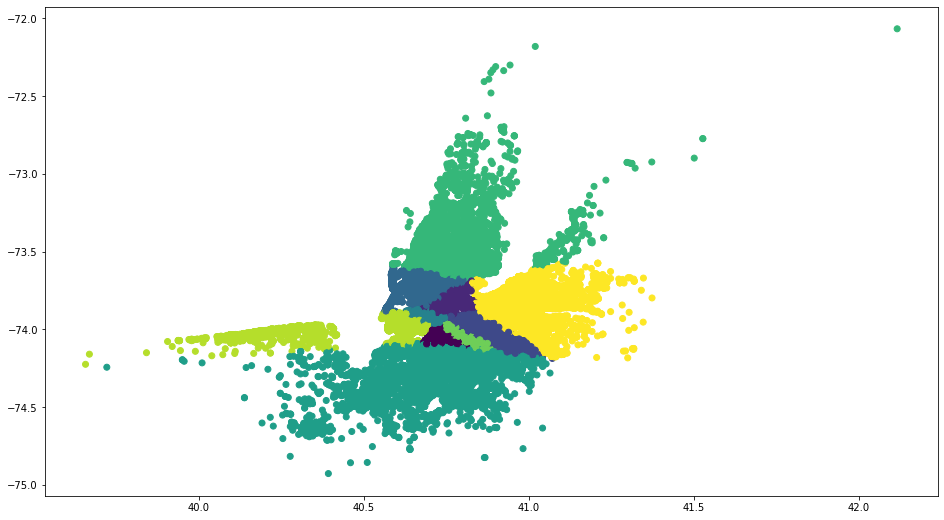

In [17]:
from sklearn.cluster import KMeans
from numpy import random, float

K = 10

lat = y_2014['Lat'].values
lon = y_2014['Lon'].values

lat_r = lat.reshape(len(lat), 1)
lon_r = lon.reshape(len(lon), 1)
cord = np.concatenate((lat_r, lon_r), 1)

model = KMeans(n_clusters=K)
model = model.fit(cord)

plt.figure(figsize=(16, 9))
plt.scatter(cord[:, 0], cord[:, 1], c=model.labels_.astype(float))
plt.show()

**The most busiest day in the week**

In [39]:
px.bar(x=y_2014['Weekday'].value_counts().index,
      y=y_2014['Weekday'].value_counts().values,
      )

**Busiest Hours in the day**

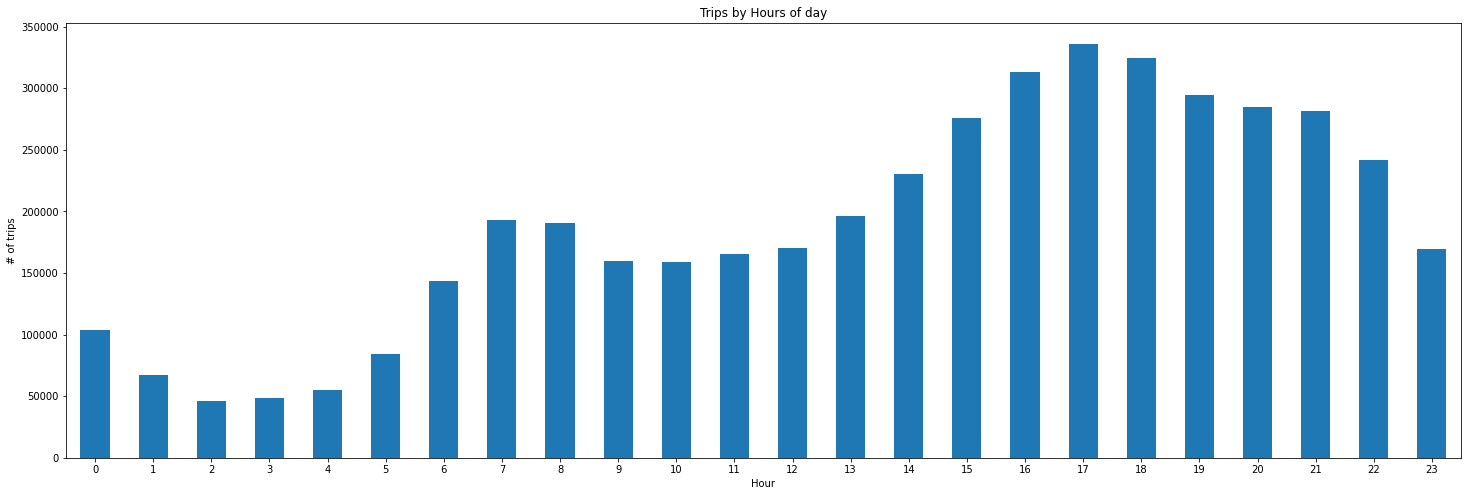

In [24]:
hourly_trip = y_2014['Hour'].value_counts().sort_index()

hourly_trip.plot(kind='bar', rot = 0, figsize =(25,8))
plt.xlabel("Hour")
plt.ylabel("# of trips")
plt.title('Trips by Hours of day');

This bar graph is represented the hourly's pickup for Uber trip in New York City during the 6-month period. We can see two peaks from this bar graph, first is in the morning (7-8 a.m.), and second in the evening(4-6 p.m.)

Compare between the weekday and weekend trips

**Most busiest Uber Trip by month**

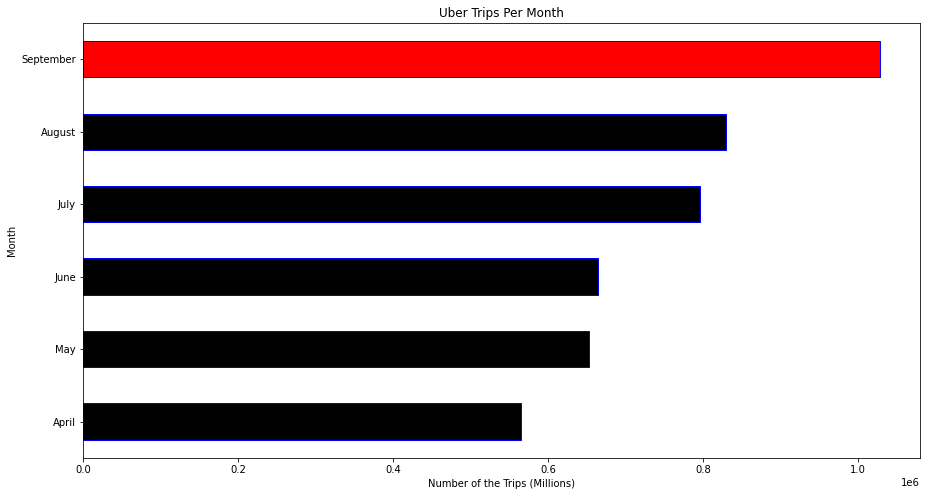

In [20]:
monthly_2014 = y_2014['Month'].value_counts(ascending=True)[month_map.values()]

monthly_2014.plot(kind='barh', rot=0, figsize =(15,8), color=['black','black','black','black','black','red'],edgecolor='blue')
plt.title('Uber Trips Per Month')
plt.ylabel('Month')
plt.xlabel('Number of the Trips (Millions)');

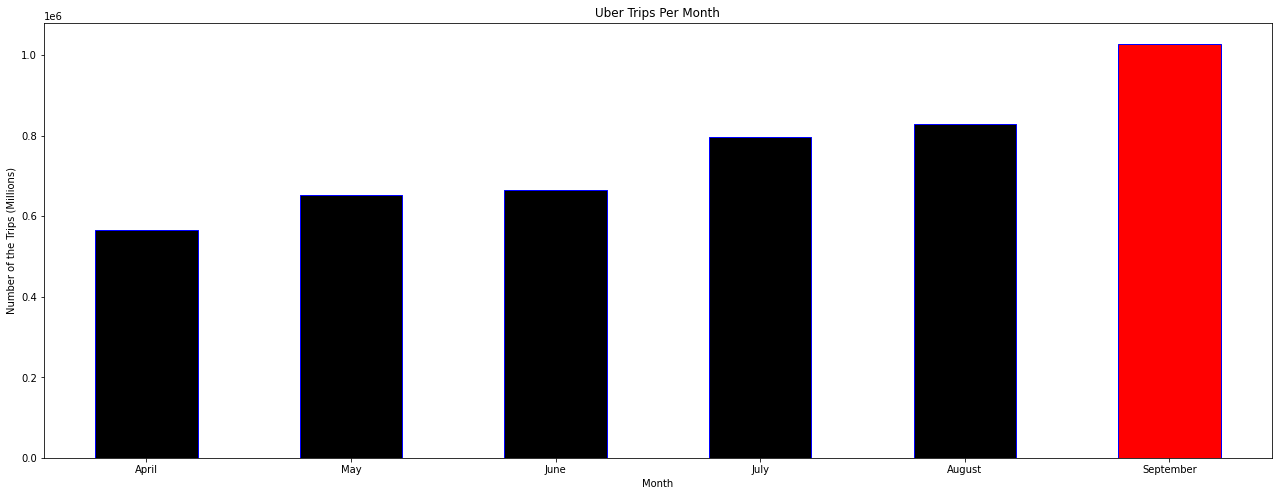

In [25]:
monthly_2014 = y_2014['Month'].value_counts(ascending=True)[month_map.values()]

monthly_2014.plot(kind='bar', rot=0, figsize =(22,8), color=['black','black','black','black','black','red'],edgecolor='blue')
plt.title('Uber Trips Per Month')
plt.xlabel('Month')
plt.ylabel('Number of the Trips (Millions)');

# Heat Map

In [44]:
def heatmap(col1,col2):
    by_cross = y_2014.groupby([col1,col2]).apply(lambda x:len(x))
    pivot=by_cross.unstack()
    plt.figure(figsize=(23,8))
    return sns.heatmap(pivot,annot=False)

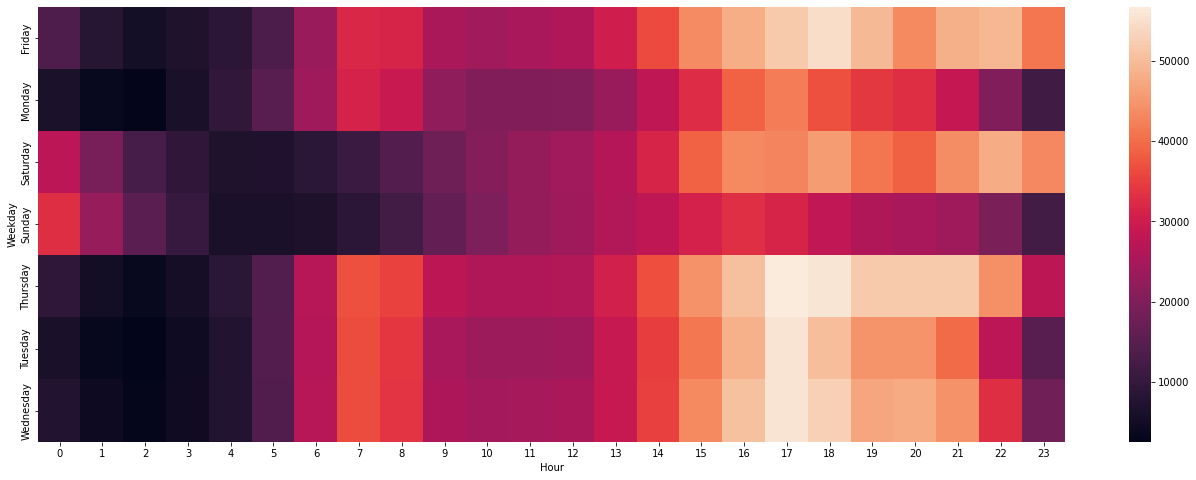

In [45]:
heatmap('Weekday','Hour')

Above heatmap diagram, we can see that weekdays(Monday to Friday) from midnight (12 a.m.) to morning(5 a.m.) have less trips than the same period on weekend. There is an interesting information form this heat map. The peak hour in after till evening(from 3 p.m. to 9 p.m.) are on Tuesday to Saturday only.

View the hour's trips in one month period.

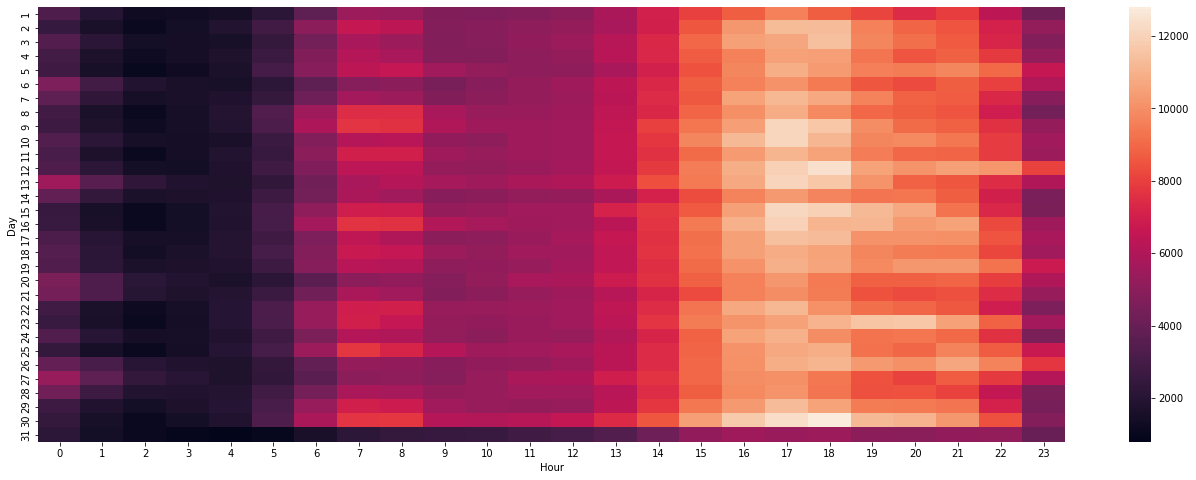

In [46]:
heatmap('Day','Hour')